Obesity stratified analysis

In [4]:
library(hei)
library(ggplot2)
library(dplyr)
library(ggrepel)
library(survey)

Overweight and obese individuals

Subset data and select disease variables

In [5]:
nahnes9906 <- load("nh_99-06.Rdata")
MainTable <- MainTable[ which(MainTable$SDDSRVYR=='4'),]
MainTableOverweight <- MainTable[ which(MainTable$RIDAGEYR >= 18 & MainTable1$BMXBMI >=25),] 
Labels <- read.csv("Outcome_Label.csv")

In [6]:
MainTable_Health <- subset(MainTableOverweight, select = c("SEQN","SDMVPSU", "SDMVSTRA", "WTMEC2YR","RIDAGEYR","BMXBMI", "black", "mexican", "other_hispanic", "other_eth", "SMQ040", "male", "female", "any_diabetes", "any_ht", "cad", "bladder_cancer_self_report", "blood_cancer_self_report", "bone_cancer_self_report", "brain_cancer_self_report", "colon_cancer_self_report", "esophagus_cancer_self_report", "gallbladder_cancer_self_report", "kidney_cancer_self_report", "larynx_cancer_self_report", "leukemia_self_report", "liver_cancer_self_report", "lung_cancer_self_report", "lymphoma_self_report", "melanoma_self_report", "mouth_cancer_self_report", "nervous_cancer_self_report", "pancreatic_cancer_self_report", "prostate_cancer_self_report", "rectum_cancer_self_report", "skin_cancer_self_report", "other_skin_cancer_self_report", "soft_cancer_self_report", "stomach_cancer_self_report", "testis_cancer_self_report", "thyroid_cancer_self_report", "uterine_cancer_self_report", "other_cancer_self_report", "any_cancer_self_report", "any_family_cad", "current_asthma", "ever_asthma", "ever_arthritis", "ever_rheumatoid_arthritis", "ever_osteo_arthritis", "LBXHBC", "LBDHBG", "LBDHCV", "LBDHD", "LBXHBS", "LBXHA", "LBDHI"))


Biomarkers_Threshold <- subset(MainTableOverweight, select =c("LBXTC", "LBDLDL", "LBXTR", "LBXGH", "LBXGLU", "LBXVIA", "LBXVIC", "LBXVID", "LBXVIE",  "LBXB12", "LBXFOL", "LBXRBF", "LBXHCY"))

#*************Threshold values*************************
#Total cholesterol - Case <= 200
Biomarkers_Threshold$LBXTC_TH <- ifelse(Biomarkers_Threshold$LBXTC <= 200, 1, 0)
#LDL -  case < 100
Biomarkers_Threshold$LBDLDL_TH <- ifelse(Biomarkers_Threshold$LBDLDL <= 100, 1, 0)
#Triglycerides - case >= 150 
Biomarkers_Threshold$LBXTR_TH <- ifelse(Biomarkers_Threshold$LBXTR <= 150, 1, 0)
#Glycohemoglobin - case <= 5.7 
Biomarkers_Threshold$LBXGH_TH <- ifelse(Biomarkers_Threshold$LBXGH <= 5.7, 1, 0)
#Fasting Glucose -case <= 100
Biomarkers_Threshold$LBXGLU_TH <- ifelse(Biomarkers_Threshold$LBXGLU <= 100, 1, 0)
#Vitamin A - case >= 20 
Biomarkers_Threshold$LBXVIA_TH <- ifelse(Biomarkers_Threshold$LBXVIA >= 20, 1, 0)
#vitamin C - case >= 11.4
Biomarkers_Threshold$LBXVIC_TH <- ifelse(Biomarkers_Threshold$LBXVIC >= 11.4, 1, 0)
#vitamin D - case >= 20
Biomarkers_Threshold$LBXVID_TH <- ifelse(Biomarkers_Threshold$LBXVID >= 20, 1, 0)
#vitamin E - case >= 500
Biomarkers_Threshold$LBXVIE_TH <- ifelse(Biomarkers_Threshold$LBXVIE >= 500, 1, 0)
#vitamin B12 - case  >= 200
Biomarkers_Threshold$LBXB12_TH <- ifelse(Biomarkers_Threshold$LBXB12 >= 200, 1, 0)
#serum folate - case >= 2
Biomarkers_Threshold$LBXFOL_TH <- ifelse(Biomarkers_Threshold$LBXFOL >= 2, 1, 0)
#plasma homocysteine
Biomarkers_Threshold$LBXHCY_TH <- ifelse(Biomarkers_Threshold$LBXHCY <= 13, 1, 0)

  
Biomarkers_Threshold <- subset(Biomarkers_Threshold, select =c("LBXTC_TH", "LBDLDL_TH", "LBXTR_TH", "LBXGH_TH", "LBXGLU_TH", "LBXVIA_TH", "LBXVIC_TH", "LBXVID_TH", "LBXVIE_TH",  "LBXB12_TH", "LBXFOL_TH", "LBXHCY_TH"))

Health_Biomarkers <- cbind(MainTable_Health, Biomarkers_Threshold)

phenotypesheath_biomarkers <- c("any_diabetes", "any_ht", "cad", "bladder_cancer_self_report", "blood_cancer_self_report", "bone_cancer_self_report", "brain_cancer_self_report", "colon_cancer_self_report", "esophagus_cancer_self_report", "gallbladder_cancer_self_report", "kidney_cancer_self_report", "larynx_cancer_self_report", "leukemia_self_report", "liver_cancer_self_report", "lung_cancer_self_report", "lymphoma_self_report", "melanoma_self_report", "mouth_cancer_self_report", "nervous_cancer_self_report", "pancreatic_cancer_self_report", "prostate_cancer_self_report", "rectum_cancer_self_report", "skin_cancer_self_report", "other_skin_cancer_self_report", "soft_cancer_self_report", "stomach_cancer_self_report", "testis_cancer_self_report", "thyroid_cancer_self_report", "uterine_cancer_self_report", "other_cancer_self_report", "any_cancer_self_report", "any_family_cad", "current_asthma", "ever_asthma", "ever_arthritis", "ever_rheumatoid_arthritis", "ever_osteo_arthritis", "LBXHBC", "LBDHBG", "LBDHCV", "LBDHD", "LBXHBS", "LBXHA", "LBDHI", "LBXTC_TH", "LBDLDL_TH", "LBXTR_TH", "LBXGH_TH", "LBXGLU_TH", "LBXVIA_TH", "LBXVIC_TH", "LBXVID_TH", "LBXVIE_TH",  "LBXB12_TH", "LBXFOL_TH", "LBXRBF_TH", "LBXHCY_TH")

using hei package to derive hei values for all individuals in subset

In [7]:
demo0506 <- get_demo("2005/2006")
diet0506 <- get_diet("2005/2006", "both")
fped0506 <- get_fped("2005/2006", "both")
hei0506 <- hei(fped0506, diet0506, demo0506)
hei0506 <- subset(hei0506, select = c(SEQN,HEI))

hei0506 <- hei0506 %>% mutate(quintile=ntile(HEI,5))

Processing SAS dataset DEMO_D 	 ..
Processing SAS dataset DR1TOT_D 	 ..
Processing SAS dataset DR2TOT_D 	 ..


Setting dataframe, cut, case, control and phenotype variables values - Can edit code if different dataframes, cuts or case control values desired to alternative analyses

In [8]:
dataframe <- Health_Biomarkers
cut <- "quintile"
case <- 5
control <- 1
phenotypes <- phenotypesheath_biomarkers

Merging quintile values to working data frame

In [9]:
hei0506_subset <- subset(hei0506, select = c("SEQN", cut))           #subset with quintile and SEQN
hei0506_subset$SEQN <- as.character( hei0506_subset$SEQN )          #change both 'SEQN' columns to characters for merging
dataframe$SEQN <- as.character( dataframe$SEQN )

hei0506_merged <- merge(dataframe, hei0506_subset, by="SEQN")     #merging the grade or qunitile with dataframe

hei0506_merged_cut <- hei0506_merged[hei0506_merged[,cut] %in% c(case, control),]   #selecting cases & control


hei0506_casecontrol <- subset(hei0506_merged_cut, select=c("SEQN", cut))#subsetting so we just have SEQN+cut 

hei0506_casecontrol[cut] <- ifelse(hei0506_casecontrol[cut]==case, 1, 0) #Converting case control to binary

hei0506_final <- inner_join(hei0506_merged, hei0506_casecontrol, by = "SEQN")  #Merge phenotypes w/ binary input
colNumber <- length(hei0506_final) - 1
colnames(hei0506_final)[colNumber] <- "casecontrol"
colNumber <- length(hei0506_final)
colnames(hei0506_final)[colNumber] <- "casevalue"

Setting survey design

In [10]:
dsn <- svydesign(ids=~SDMVPSU, strata=~SDMVSTRA, weights=~WTMEC2YR, nest=T, data=hei0506_final, variables = NULL)

Creating dataframe for results

In [19]:
hei0506_result_OverweightObese <- as.data.frame(matrix(ncol =8))

For loop to run logistic regression for all disease outcomes

In [20]:
for(i in 14:ncol(hei0506_final)-2){
                                                                                    
 print( i )

myglm <- svyglm(as.formula(paste0(names(hei0506_final)[i], "~ casevalue + black + mexican + other_hispanic + other_eth + RIDAGEYR + RIDAGEYR^2 + female + BMXBMI + SMQ040")),design = dsn,
                family = binomial(),
                na.action = na.omit)

#confidence interval
ci <- exp(summary(myglm)$coefficients["casevalue",1]+qnorm(c(0.025, 0.975)) * summary(myglm)$coefficients["casevalue",2])


excludedPatients <- sum(is.na(hei0506_final[, i ]))
    casecontrol <-  hei0506_final[, c(names(hei0506_final)[i], "SEQN", "casevalue")]
    casecontrol <- na.omit( casecontrol )
    heihighpositive <- length(unique(casecontrol[casecontrol[,1]== 1 & casecontrol$casevalue== 1, "SEQN"]))
    heihighnegative <- length(unique(casecontrol[casecontrol[,1]== 0 & casecontrol$casevalue== 1, "SEQN"]))
    heilowpositive <- length(unique(casecontrol[casecontrol[,1]== 1 & casecontrol$casevalue== 0, "SEQN"]))
    heilownegative <- length(unique(casecontrol[casecontrol[,1]== 0 & casecontrol$casevalue== 0, "SEQN"]))
 

    
newRow <- c (names(hei0506_final)[i], summary(myglm)$coefficients[2], exp(summary(myglm)$coefficients[2]), paste0("(", round(ci[1][1],3), ",", round(ci[2][1],3), ")"),
summary(myglm)$coefficients[2,4], paste0(heihighpositive+heilowpositive,"(",heihighpositive,"/",heilowpositive,")"), paste0(heihighnegative+heilownegative,"(",heihighnegative,"/",heilownegative,")"), excludedPatients
                  )
    
hei0506_result_OverweightObese <- rbind( newRow, hei0506_result_OverweightObese ) 


}

[1] 12


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”Warning message:
“glm.fit: algorithm did not converge”

[1] 13


Warning message in model.matrix.default(mt, mf, contrasts):
“the response appeared on the right-hand side and was dropped”Warning message in model.matrix.default(mt, mf, contrasts):
“problem with term 7 in model.matrix: no columns are assigned”Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”Warning message in model.matrix.default(glm.object, data = structure(list(female = c(0, :
“the response appeared on the right-hand side and was dropped”Warning message in model.matrix.default(glm.object, data = structure(list(female = c(0, :
“problem with term 7 in model.matrix: no columns are assigned”

[1] 14


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”

[1] 15


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”

[1] 16


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”

[1] 17


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 18


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 19


Warning message:
“glm.fit: algorithm did not converge”

[1] 20


Warning message:
“glm.fit: algorithm did not converge”

[1] 21


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 22


Warning message:
“glm.fit: algorithm did not converge”

[1] 23


Warning message:
“glm.fit: algorithm did not converge”

[1] 24


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 25


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 26


Warning message:
“glm.fit: algorithm did not converge”

[1] 27


Warning message:
“glm.fit: algorithm did not converge”

[1] 28


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 29


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 30


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”

[1] 31


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 32


Warning message:
“glm.fit: algorithm did not converge”

[1] 33


Warning message:
“glm.fit: algorithm did not converge”

[1] 34


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 35


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 36


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”

[1] 37


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 38


Warning message:
“glm.fit: algorithm did not converge”

[1] 39


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 40


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 41


Warning message:
“glm.fit: algorithm did not converge”

[1] 42


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 43


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”

[1] 44


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”

[1] 45


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”

[1] 46


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”

[1] 47


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”

[1] 48


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”

[1] 49


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”

[1] 50


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”

[1] 51


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”

[1] 52


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 53


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”

[1] 54


Warning message:
“glm.fit: algorithm did not converge”

[1] 55


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”

[1] 56


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”

[1] 57


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”

[1] 58


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”

[1] 59


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”

[1] 60


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”

[1] 61


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”

[1] 62


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”

[1] 63


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 64


Warning message:
“glm.fit: algorithm did not converge”

[1] 65


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”

[1] 66


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 67


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”

[1] 68


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”Warning message:
“glm.fit: algorithm did not converge”

[1] 69


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”

Changing column name and adding columns for adjusted p-values

In [22]:
colnames( hei0506_result_OverweightObese) <- c("Outcome", "Coefficient", "OR", "CI", "P-value", "Outcome_Present", "Outcome_Negative", "NA_Patient")

hei0506_result_OverweightObese$padjustFdr <- p.adjust( as.numeric( hei0506_result_OverweightObese$`P-value`), method = "fdr")
hei0506_result_OverweightObese$padjustBonferroni <- p.adjust( as.numeric( hei0506_result_OverweightObese$`P-value`), method = "bonferroni")


hei0506_result_OverweightObese$logfdr <- -log( as.numeric(hei0506_result_OverweightObese$padjustFdr))
hei0506_result_OverweightObese$logbonf <- -log( as.numeric(hei0506_result_OverweightObese$padjustBonferroni))

hei0506_result_OverweightObese <- merge(hei0506_result_OverweightObese, Labels, by = "Outcome")

hei0506_result_OverweightObese$Association <- as.factor(ifelse(hei0506_result_OverweightObese$OR > 1, "OR > 1", "OR <= 1"))


head(hei0506_result_OverweightObese)

Outcome,Coefficient,OR,CI,P-value,Outcome_Present,Outcome_Negative,NA_Patient,padjustFdr,padjustBonferroni,logfdr,logbonf,Label,Association
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
any_cancer_self_report,-0.308799362337741,0.734328089118022,"(0.488,1.105)",0.188914293884901,103(69/34),1066(624/442),88,4.763926e-01,1.000000e+00,0.74151304,0.00000,any cancer,OR <= 1
any_diabetes,0.553348800236355,1.73906706559204,"(0.972,3.113)",0.111784180755009,178(139/39),1066(564/502),13,3.087373e-01,1.000000e+00,1.17526465,0.00000,diabetes,OR > 1
any_family_cad,-0.388745978948463,0.677906450653731,"(0.385,1.193)",0.226265485396931,154(80/74),990(599/391),113,5.468083e-01,1.000000e+00,0.60365707,0.00000,family CAD,OR <= 1
any_ht,-0.176565382852684,0.838143977119463,"(0.581,1.209)",0.38085501384654,473(308/165),782(401/381),2,7.495475e-01,1.000000e+00,0.28828560,0.00000,hypertension,OR <= 1
blood_cancer_self_report,-257.19716400911,1.9984390607772e-112,"(0,0)",6.07452568318431e-07,1(0/1),1066(624/442),190,1.094486e-05,3.523225e-05,11.42264024,10.25355,blood cancer,OR > 1
bone_cancer_self_report,-0.0212954771491185,0.978929670483446,"(0.778,1.232)",0.862154406803097,0(0/0),1066(624/442),191,9.260177e-01,1.000000e+00,0.07686193,0.00000,bone cancer,OR <= 1


In [23]:
Using ggplot to create Manhatten plot for results

ERROR: Error in parse(text = x, srcfile = src): <text>:1:7: unexpected symbol
1: Using ggplot
          ^


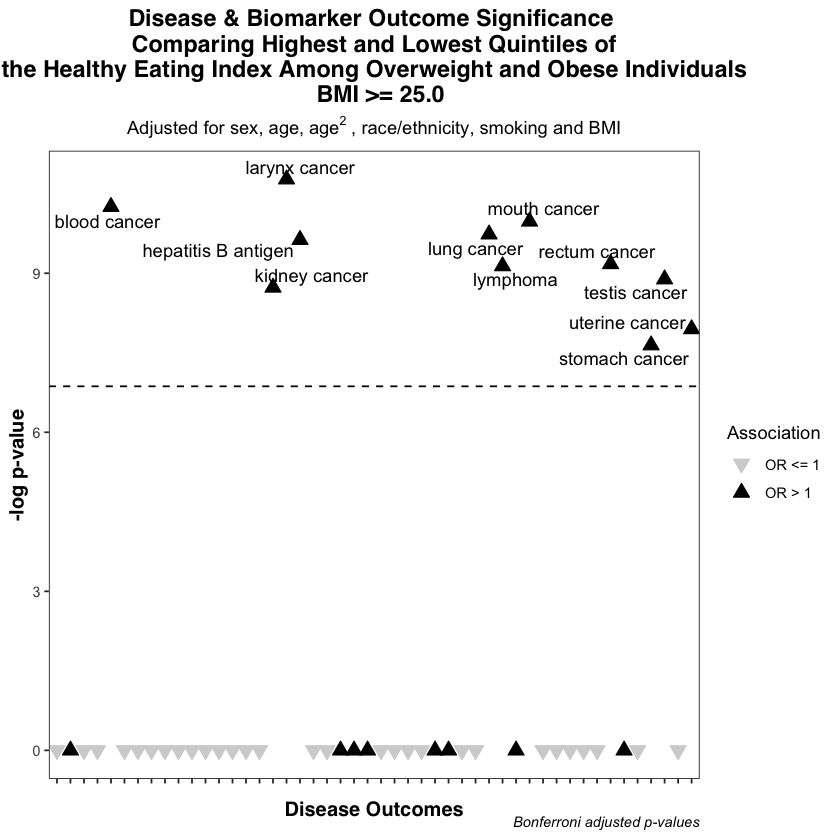

In [25]:
ggplot(hei0506_result_OverweightObese, aes(Outcome, logbonf))+ 
geom_point(aes(color = Association, fill = Association, shape = Association), size=3)+
scale_shape_manual(values=c(25, 24))+
scale_fill_manual(values=c("lightgray","black"))+
scale_color_manual(values = c("lightgray", "black"))+
geom_text_repel(data = subset(hei0506_result_OverweightObese, logbonf > -log(0.05/nrow(hei0506_result_OverweightObese)) ),aes(label=Label))+
geom_hline(yintercept= (-log(0.05/nrow(hei0506_result_OverweightObese))), linetype="dashed", color = "black")+
labs(title ="Disease & Biomarker Outcome Significance \n Comparing Highest and Lowest Quintiles of \n the Healthy Eating Index Among Overweight and Obese Individuals \n  BMI >= 25.0",
     subtitle = bquote("Adjusted for sex, age,"~ age^2~", race/ethnicity, smoking and BMI"),
     caption = "Bonferroni adjusted p-values")+
ylab("-log p-value")+
xlab("Disease Outcomes")+
#ggtitle("Disease & Biomarker Outcome Significance \n Comparing Highest and Lowest Quintiles of Healthy Eating Index")+
theme_bw()+
theme(axis.text.x = element_blank(), 
      panel.grid.major = element_blank(), 
      panel.grid.minor = element_blank(), 
      plot.subtitle = element_text(face = "italic", hjust = 0.5),
      plot.caption = element_text(face = "italic", hjust = 1),
      axis.title.x = element_text(family="Helvetica", face = "bold", size = 12, vjust = -2),
      axis.title.y = element_text(family="Helvetica", face = "bold", size = 12),
      plot.title=element_text(family = "Helvetica", face = "bold", size = 14, hjust=0.5))

Normalweight individuals

Subset data and select disease variables 

In [27]:
MainTableNormal <- MainTable[ which(MainTable$RIDAGEYR >= 18 & MainTable$BMXBMI > 18.5 & MainTable$BMXBMI < 25),] 

MainTable_Health <- subset(MainTableNormal, select = c("SEQN","SDMVPSU", "SDMVSTRA", "WTMEC2YR","RIDAGEYR","BMXBMI", "black", "mexican", "other_hispanic", "other_eth", "SMQ040", "male", "female", "any_diabetes", "any_ht", "cad", "bladder_cancer_self_report", "blood_cancer_self_report", "bone_cancer_self_report", "brain_cancer_self_report", "breast_cancer_self_report", "cervix_cacner_self_report", "colon_cancer_self_report", "esophagus_cancer_self_report", "gallbladder_cancer_self_report", "kidney_cancer_self_report", "larynx_cancer_self_report", "leukemia_self_report", "liver_cancer_self_report", "lung_cancer_self_report", "lymphoma_self_report", "melanoma_self_report", "mouth_cancer_self_report", "nervous_cancer_self_report", "ovarian_cancer_self_report", "pancreatic_cancer_self_report", "prostate_cancer_self_report", "rectum_cancer_self_report", "skin_cancer_self_report", "other_skin_cancer_self_report", "soft_cancer_self_report", "stomach_cancer_self_report", "testis_cancer_self_report", "thyroid_cancer_self_report", "uterine_cancer_self_report", "other_cancer_self_report", "any_cancer_self_report", "any_family_cad", "current_asthma", "ever_asthma", "ever_arthritis", "ever_rheumatoid_arthritis", "ever_osteo_arthritis", "LBXHBC", "LBDHBG", "LBDHCV", "LBDHD", "LBXHBS", "LBXHA", "LBDHI"))

Biomarkers_Threshold <- subset(MainTableNormal, select =c("LBXTC", "LBDLDL", "LBXTR", "LBXGH", "LBXGLU", "LBXVIA", "LBXVIC", "LBXVID", "LBXVIE",  "LBXB12", "LBXFOL", "LBXRBF", "LBXFER", "LBXHCY"))


#*************Threshold values*************************

#Total cholesterol - Case <= 200
Biomarkers_Threshold$LBXTC_TH <- ifelse(Biomarkers_Threshold$LBXTC <= 200, 1, 0)
#LDL -  case < 100
Biomarkers_Threshold$LBDLDL_TH <- ifelse(Biomarkers_Threshold$LBDLDL <= 100, 1, 0)
#Triglycerides - case >= 150 
Biomarkers_Threshold$LBXTR_TH <- ifelse(Biomarkers_Threshold$LBXTR <= 150, 1, 0)
#Glycohemoglobin - case <= 5.7 
Biomarkers_Threshold$LBXGH_TH <- ifelse(Biomarkers_Threshold$LBXGH <= 5.7, 1, 0)
#Fasting Glucose -case <= 100
Biomarkers_Threshold$LBXGLU_TH <- ifelse(Biomarkers_Threshold$LBXGLU <= 100, 1, 0)
#Vitamin A - case >= 20 
Biomarkers_Threshold$LBXVIA_TH <- ifelse(Biomarkers_Threshold$LBXVIA >= 20, 1, 0)
#vitamin C - case >= 11.4
Biomarkers_Threshold$LBXVIC_TH <- ifelse(Biomarkers_Threshold$LBXVIC >= 11.4, 1, 0)
#vitamin D - case >= 20
Biomarkers_Threshold$LBXVID_TH <- ifelse(Biomarkers_Threshold$LBXVID >= 20, 1, 0)
#vitamin E - case >= 500
Biomarkers_Threshold$LBXVIE_TH <- ifelse(Biomarkers_Threshold$LBXVIE >= 500, 1, 0)
#vitamin B12 - case  >= 200
Biomarkers_Threshold$LBXB12_TH <- ifelse(Biomarkers_Threshold$LBXB12 >= 200, 1, 0)
#serum folate - case >= 2
Biomarkers_Threshold$LBXFOL_TH <- ifelse(Biomarkers_Threshold$LBXFOL >= 2, 1, 0)
#RBC FOLATE
Biomarkers_Threshold$LBXRBF_TH <- ifelse(Biomarkers_Threshold$LBXRBF >= 95, 1, 0)
#ferritin
Biomarkers_Threshold$LBXFER_TH <- ifelse(Biomarkers_Threshold$LBXFER >= 15, 1, 0)
#plasma homocysteine
Biomarkers_Threshold$LBXHCY_TH <- ifelse(Biomarkers_Threshold$LBXHCY <= 13, 1, 0)

Biomarkers_Threshold <- subset(Biomarkers_Threshold, select =c("LBXTC_TH", "LBDLDL_TH", "LBXTR_TH", "LBXGH_TH", "LBXGLU_TH", "LBXVIA_TH", "LBXVIC_TH", "LBXVID_TH", "LBXVIE_TH",  "LBXB12_TH", "LBXFOL_TH", "LBXRBF_TH", "LBXFER_TH", "LBXHCY_TH"))

Health_Biomarkers <- cbind(MainTable_Health, Biomarkers_Threshold)

phenotypesheath_biomarkers <- c("any_diabetes", "any_ht", "cad", "bladder_cancer_self_report", "blood_cancer_self_report", "bone_cancer_self_report", "brain_cancer_self_report", "breast_cancer_self_report", "cervix_cacner_self_report", "colon_cancer_self_report", "esophagus_cancer_self_report", "gallbladder_cancer_self_report", "kidney_cancer_self_report", "larynx_cancer_self_report", "leukemia_self_report", "liver_cancer_self_report", "lung_cancer_self_report", "lymphoma_self_report", "melanoma_self_report", "mouth_cancer_self_report", "nervous_cancer_self_report", "ovarian_cancer_self_report", "pancreatic_cancer_self_report", "prostate_cancer_self_report", "rectum_cancer_self_report", "skin_cancer_self_report", "other_skin_cancer_self_report", "soft_cancer_self_report", "stomach_cancer_self_report", "testis_cancer_self_report", "thyroid_cancer_self_report", "uterine_cancer_self_report", "other_cancer_self_report", "any_cancer_self_report", "any_family_cad", "current_asthma", "ever_asthma", "ever_arthritis", "ever_rheumatoid_arthritis", "ever_osteo_arthritis", "LBXHBC", "LBDHBG", "LBDHCV", "LBDHD", "LBXHBS", "LBXHA", "LBDHI", "LBXTC_TH", "LBDLDL_TH", "LBXTR_TH", "LBXGH_TH", "LBXGLU_TH", "LBXVIA_TH", "LBXVIC_TH", "LBXVID_TH", "LBXVIE_TH",  "LBXB12_TH", "LBXFOL_TH", "LBXRBF_TH", "LBXFER_TH", "LBXHCY_TH")

Selecting dataframe, case, control and phenotype list

In [28]:
dataframe <- Health_Biomarkers
cut <- "quintile"
case <- 5
control <- 1
phenotypes <- phenotypesheath_biomarkers

Merging quintile values with working dataframe

In [29]:
hei0506_subset <- subset(hei0506, select = c("SEQN", cut))           #subset with grade or quintile and SEQN
hei0506_subset$SEQN <- as.character( hei0506_subset$SEQN )          #change both 'SEQN' columns to characters for merging
dataframe$SEQN <- as.character( dataframe$SEQN )

hei0506_merged <- merge(dataframe, hei0506_subset, by="SEQN")     #merging the grade or qunitile with dataframe

hei0506_merged_cut <- hei0506_merged[hei0506_merged[,cut] %in% c(case, control),]   #selecting cases & control


hei0506_casecontrol <- subset(hei0506_merged_cut, select=c("SEQN", cut))#subsetting so we just have SEQN+cut 

hei0506_casecontrol[cut] <- ifelse(hei0506_casecontrol[cut]==case, 1, 0) #Converting case control to binary

hei0506_final <- inner_join(hei0506_merged, hei0506_casecontrol, by = "SEQN")  #Merge phenotypes w/ binary input
colNumber <- length(hei0506_final) - 1
colnames(hei0506_final)[colNumber] <- "casecontrol"
colNumber <- length(hei0506_final)
colnames(hei0506_final)[colNumber] <- "casevalue"


Setting survey design

In [30]:
dsn <- svydesign(ids=~SDMVPSU, strata=~SDMVSTRA, weights=~WTMEC2YR, nest=T, data=hei0506_final, variables = NULL)

Creating dataframe matrix for results

In [31]:
hei0506_result_Normalweight <- as.data.frame(matrix(ncol =8))

For loop to run all regressions

In [32]:
for(i in 14:ncol(hei0506_final)-2){
                                                                                           #Writingglm
 print( i )

myglm <- svyglm(as.formula(paste0(names(hei0506_final)[i], "~ casevalue + black + mexican + other_hispanic + other_eth + SMQ040 + female+ RIDAGEYR + RIDAGEYR^2 + BMXBMI")),design = dsn,
                family = binomial(),
                na.action = na.omit)

#confidence interval
ci <- exp(summary(myglm)$coefficients["casevalue",1]+qnorm(c(0.025, 0.975)) * summary(myglm)$coefficients["casevalue",2])


excludedPatients <- sum(is.na(hei0506_final[, i ]))
    casecontrol <-  hei0506_final[, c(names(hei0506_final)[i], "SEQN", "casevalue")]
    casecontrol <- na.omit( casecontrol )
    heihighpositive <- length(unique(casecontrol[casecontrol[,1]== 1 & casecontrol$casevalue== 1, "SEQN"]))
    heihighnegative <- length(unique(casecontrol[casecontrol[,1]== 0 & casecontrol$casevalue== 1, "SEQN"]))
    heilowpositive <- length(unique(casecontrol[casecontrol[,1]== 1 & casecontrol$casevalue== 0, "SEQN"]))
    heilownegative <- length(unique(casecontrol[casecontrol[,1]== 0 & casecontrol$casevalue== 0, "SEQN"]))
 

    
newRow <- c (names(hei0506_final)[i], summary(myglm)$coefficients[2], exp(summary(myglm)$coefficients[2]), paste0("(", round(ci[1][1],3), ",", round(ci[2][1],3), ")"),
summary(myglm)$coefficients[2,4], paste0(heihighpositive+heilowpositive,"(",heihighpositive,"/",heilowpositive,")"), paste0(heihighnegative+heilownegative,"(",heihighnegative,"/",heilownegative,")"), excludedPatients
                  )
    
hei0506_result_Normalweight <- rbind( newRow, hei0506_result_Normalweight ) 


}

[1] 12


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”Warning message:
“glm.fit: algorithm did not converge”

[1] 13


Warning message in model.matrix.default(mt, mf, contrasts):
“the response appeared on the right-hand side and was dropped”Warning message in model.matrix.default(mt, mf, contrasts):
“problem with term 7 in model.matrix: no columns are assigned”Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”Warning message in model.matrix.default(glm.object, data = structure(list(female = c(0, :
“the response appeared on the right-hand side and was dropped”Warning message in model.matrix.default(glm.object, data = structure(list(female = c(0, :
“problem with term 7 in model.matrix: no columns are assigned”

[1] 14


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”

[1] 15


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”

[1] 16


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”

[1] 17


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 18


Warning message:
“glm.fit: algorithm did not converge”

[1] 19


Warning message:
“glm.fit: algorithm did not converge”

[1] 20


Warning message:
“glm.fit: algorithm did not converge”

[1] 21


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 22


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 23


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 24


Warning message:
“glm.fit: algorithm did not converge”

[1] 25


Warning message:
“glm.fit: algorithm did not converge”

[1] 26


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 27


Warning message:
“glm.fit: algorithm did not converge”

[1] 28


Warning message:
“glm.fit: algorithm did not converge”

[1] 29


Warning message:
“glm.fit: algorithm did not converge”

[1] 30


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 31


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 32


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 33


Warning message:
“glm.fit: algorithm did not converge”

[1] 34


Warning message:
“glm.fit: algorithm did not converge”

[1] 35


Warning message:
“glm.fit: algorithm did not converge”

[1] 36


Warning message:
“glm.fit: algorithm did not converge”

[1] 37


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 38


Warning message:
“glm.fit: algorithm did not converge”

[1] 39


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 40


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 41


Warning message:
“glm.fit: algorithm did not converge”

[1] 42


Warning message:
“glm.fit: algorithm did not converge”

[1] 43


Warning message:
“glm.fit: algorithm did not converge”

[1] 44


Warning message:
“glm.fit: algorithm did not converge”

[1] 45


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 46


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 47


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”

[1] 48


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”

[1] 49


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”

[1] 50


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”

[1] 51


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”

[1] 52


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”

[1] 53


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”

[1] 54


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”

[1] 55


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”

[1] 56


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”

[1] 57


Warning message:
“glm.fit: algorithm did not converge”

[1] 58


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”

[1] 59


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”

[1] 60


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 61


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”

[1] 62


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”

[1] 63


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”

[1] 64


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”

[1] 65


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”

[1] 66


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”Warning message:
“glm.fit: algorithm did not converge”

[1] 67


Warning message:
“glm.fit: algorithm did not converge”

[1] 68


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”

[1] 69


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 70


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”

[1] 71


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”Warning message:
“glm.fit: algorithm did not converge”

[1] 72


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 73


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”

[1] 74


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”

Renaming columns and adding columns with adjusted pvalues and OR designation

In [34]:
colnames( hei0506_result_Normalweight) <- c("Outcome", "Coefficient", "OR", "CI", "P-value", "Outcome_Present", "Outcome_Negative", "NA_Patient")

hei0506_result_Normalweight$padjustFdr <- p.adjust( as.numeric( hei0506_result_Normalweight$`P-value`), method = "fdr")
hei0506_result_Normalweight$padjustBonferroni <- p.adjust( as.numeric( hei0506_result_Normalweight$`P-value`), method = "bonferroni")

hei0506_result_Normalweight$logfdr <- -log( as.numeric(hei0506_result_Normalweight$padjustFdr))
hei0506_result_Normalweight$logbonf <- -log( as.numeric(hei0506_result_Normalweight$padjustBonferroni))

hei0506_result_Normalweight$Association <- as.factor(ifelse(hei0506_result_Normalweight$OR > 1, "OR > 1", "OR <= 1"))

hei0506_result_Normalweight <- merge(hei0506_result_Normalweight, Labels, by = "Outcome")

head(hei0506_result_Normalweight)



Warning message in merge.data.frame(hei0506_result_Normalweight, Labels, by = "Outcome"):
“column names ‘NA’, ‘NA’, ‘NA’, ‘NA’ are duplicated in the result”

Outcome,Coefficient,OR,CI,P-value,Outcome_Present,Outcome_Negative,NA_Patient,NA,NA,NA,NA,NA,padjustFdr,padjustBonferroni,logfdr,logbonf,Association,Label
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
any_cancer_self_report,-0.296136700992522,0.743685758489865,"(0.191,2.889)",0.683757078796119,53(43/10),439(263/176),102,0.9088222,1,0.09560581,0,OR <= 1,0.9088222,1,0.09560581,0,OR <= 1,any cancer
any_diabetes,0.492089276844365,1.63573014551238,"(0.325,8.237)",0.572563416139999,39(31/8),554(294/260),1,0.9088222,1,0.09560581,0,OR > 1,0.9088222,1,0.09560581,0,OR > 1,diabetes
any_family_cad,-0.817826341415218,0.441390043781014,"(0.132,1.479)",0.233210247403309,55(30/25),424(271/153),115,0.7614307,1,0.27255610,0,OR <= 1,0.7614307,1,0.27255610,0,OR <= 1,family CAD
any_ht,-0.491395994941621,0.611771767503084,"(0.336,1.114)",0.159286860360258,122(86/36),472(240/232),0,0.5575040,1,0.58428558,0,OR <= 1,0.5575040,1,0.58428558,0,OR <= 1,hypertension
blood_cancer_self_report,-0.0278061311089209,0.972576900930478,"(0.68,1.391)",0.883938807225875,1(0/1),439(263/176),154,0.9088222,1,0.09560581,0,OR <= 1,0.9088222,1,0.09560581,0,OR <= 1,blood cancer
bone_cancer_self_report,-0.0278061311089209,0.972576900930478,"(0.68,1.391)",0.883938807225875,1(0/1),439(263/176),154,0.9088222,1,0.09560581,0,OR <= 1,0.9088222,1,0.09560581,0,OR <= 1,bone cancer


Using ggplot to produce Manhatten plot for results

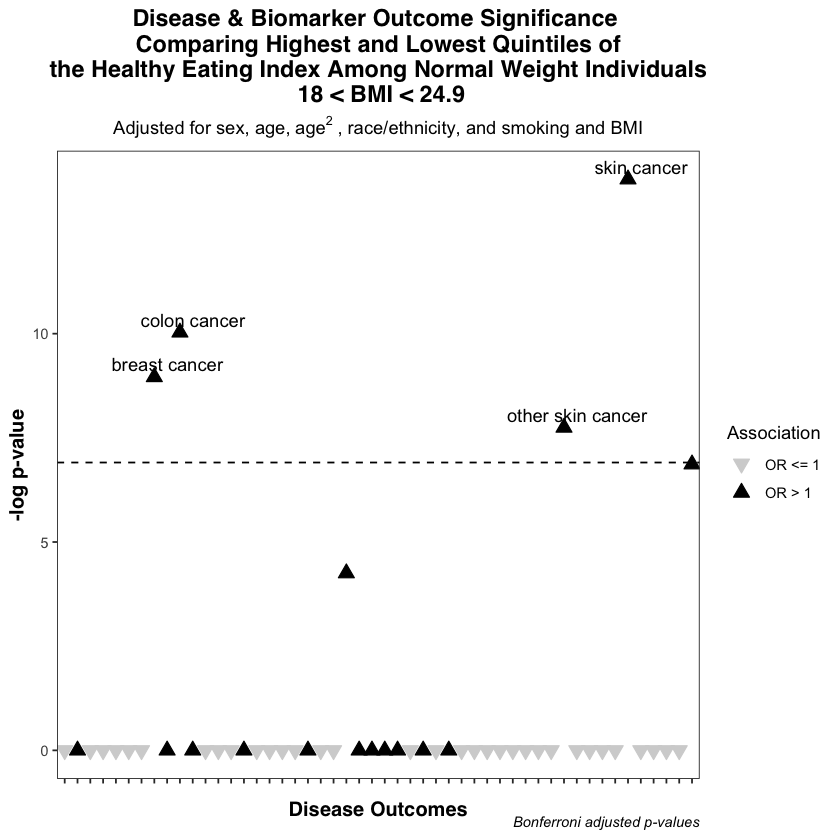

In [35]:
ggplot(hei0506_result_Normalweight, aes(Outcome, logbonf))+ 
geom_point(aes(color = Association, fill = Association, shape = Association), size=3)+
scale_shape_manual(values=c(25, 24))+
scale_fill_manual(values=c("lightgray","black"))+
scale_color_manual(values = c("lightgray", "black"))+
geom_text_repel(data = subset(hei0506_result_Normalweight, logbonf > -log(0.05/nrow(hei0506_result_Normalweight)) ),aes(label=Label))+
geom_hline(yintercept= (-log(0.05/nrow(hei0506_result_Normalweight))), linetype="dashed", color = "black")+
labs(title ="Disease & Biomarker Outcome Significance \n Comparing Highest and Lowest Quintiles of \n the Healthy Eating Index Among Normal Weight Individuals \n 18 < BMI < 24.9",
     subtitle = bquote("Adjusted for sex, age,"~ age^2~", race/ethnicity, and smoking and BMI"),
     caption = "Bonferroni adjusted p-values")+
ylab("-log p-value")+
xlab("Disease Outcomes")+
#ggtitle("Disease & Biomarker Outcome Significance \n Comparing Highest and Lowest Quintiles of Healthy Eating Index")+
theme_bw()+
theme(axis.text.x = element_blank(), 
      panel.grid.major = element_blank(), 
      panel.grid.minor = element_blank(), 
      plot.subtitle = element_text(face = "italic", hjust = 0.5),
      plot.caption = element_text(face = "italic", hjust = 1),
      axis.title.x = element_text(family="Helvetica", face = "bold", size = 12, vjust = -2),
      axis.title.y = element_text(family="Helvetica", face = "bold", size = 12),
      plot.title=element_text(family = "Helvetica", face = "bold", size = 14, hjust=0.5))